# Project 2 SSE 692

## Intro
For this project, we have to show what we learned about Regression and Support Vector Machines and we use them. To show our understanding with Regression, my partner Danny and I chose a dataset we found online about housing in Boston. To show our understanding with Support Vector Machines we are going to use the titanic dataset we used in project 1.

### Linear Regression
For this problem, we first need to import the Boston dataset that we will be using. Then we will load the data into different panda dataframes. I will also make another dataset called raw_both that will have combine the feature_names and target for use later.

In [135]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd 
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

raw_data = load_boston()
raw_data_df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
raw_labels_df = pd.DataFrame(raw_data.target, columns=["target"])
raw_both = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
raw_both['target'] = raw_data.target
raw_both.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we need to load the data into the pandas dataframe.

In [136]:
raw_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Since we only loading the feature_names dataset, we now need to add the target dataset.

In [137]:
raw_labels_df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


From here, we will make the correlation matrix to see what we have thats strongly correlated.

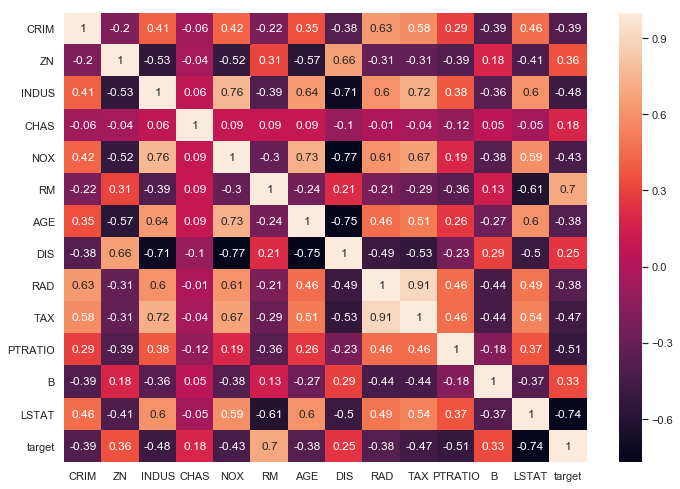

In [138]:
correlation_matrix = raw_both.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Looking at this, I found 3 columns (LSTAT, RM, PTRATIO) that are strongly correlated with the target column so i chose to use those 3 for my linear regression.

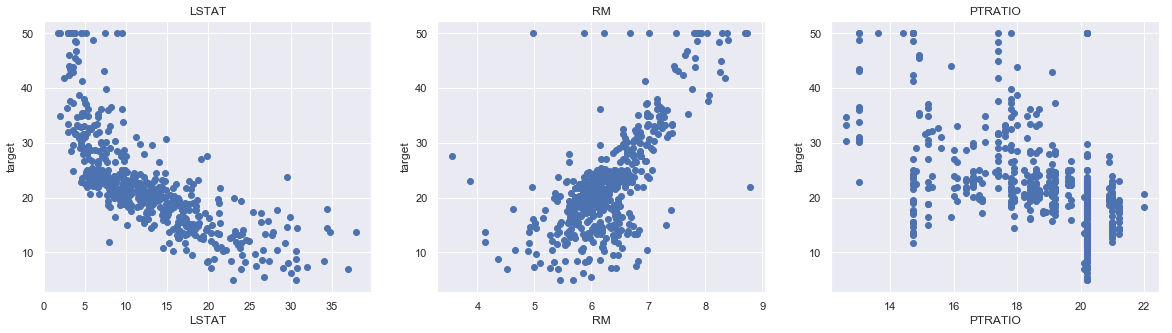

In [139]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
target = raw_labels_df['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = raw_both[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')


From here, i split the LSTAT, RM, and PTRATIO columns into X, and the target column into Y.

In [140]:
X = pd.DataFrame(np.c_[raw_data_df['LSTAT'], raw_data_df['RM'], raw_data_df['PTRATIO']], columns = ['LSTAT','RM', 'PTRATIO'])
Y = raw_labels_df['target']

From this we will make our training and testing datasets.

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Now we will make our linear regression model and train it with the train data.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now we can find out how accurate our model was.

In [143]:
y_test_predict = linreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 4.516751541758421
R2 score is 0.7561424566998521


We can see that the R2 score was a .76, so we have a 76% accuracy which is pretty good given the dataset.

### Support Vector Machine

For SVM, i will be tackling the titanic dataset. First thing i need to do is import the titanic dataset. Also, after collaborating with Danny and him looking at my previous project, it turns out i was actually using the train data for both training and testing. So in this project, i will use some of the same methods and see how they work when actually used with test data. I will split the train_data into a train and test set later on.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("titanic/train.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we can look into our dataset and kinda decide what we think we can get rid of.

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
train_data = train_data.drop(['Name', 'PassengerId', 'Parch', 'Ticket', 'Cabin', 'SibSp'], axis=1)

In [28]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


Now we can seperate age into more appropriate groups so we get the most out of that group.

In [31]:
data = [train_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(35)
    dataset['Age'] = dataset['Age'].astype(int)   
    
train_data['AgeGroups'] = pd.cut(train_data['Age'], 10)

print (train_data[['AgeGroups', 'Survived']].groupby(['AgeGroups'], as_index=False).mean())  

      AgeGroups  Survived
0  (-0.08, 8.0]  0.666667
1   (8.0, 16.0]  0.413043
2  (16.0, 24.0]  0.353933
3  (24.0, 32.0]  0.388235
4  (32.0, 40.0]  0.349153
5  (40.0, 48.0]  0.352941
6  (48.0, 56.0]  0.466667
7  (56.0, 64.0]  0.375000
8  (64.0, 72.0]  0.000000
9  (72.0, 80.0]  0.500000


In [32]:
for dataset in data:
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 72), 'Age'] = 5
    
train_data = train_data.drop(['AgeGroups'], axis=1)

In [33]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,2,7.2500,S
1,1,1,female,4,71.2833,C
2,1,3,female,3,7.9250,S
3,1,1,female,4,53.1000,S
4,0,3,male,4,8.0500,S


Now we are going to replace Sex and Embarked with numbers so our program can be trained.

In [39]:
data = [train_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [40]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,2,7.2500,0
1,1,1,0,4,71.2833,1
2,1,3,0,3,7.9250,0
3,1,1,0,4,53.1000,0
4,0,3,1,4,8.0500,0


Finally, we will do the same thing to Fare and we did with Age.

In [41]:
data = [train_data]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 52.369), 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [42]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,2,0,0
1,1,1,0,4,5,1
2,1,3,0,3,1,0
3,1,1,0,4,5,0
4,0,3,1,4,1,0


We will now split the train_data dataset into 2 groups. X will be what we use to determine if a passenger survived or not and Y will be how we know if they survived.

In [43]:
X = train_data.drop('Survived', axis=1)
Y = train_data['Survived']

From these X and Y groups, we can now split it up even further by making a x_train, x_test, y_train, and a y_test

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Now we will import the SVC from sklearn and train our program using the x_train and the y_train.

In [56]:
from sklearn.svm import SVC

clf = SVC(gamma = "auto")
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To test how accurate the program is, we can test it using x_test and y_test.

In [57]:
accuracy = round(clf.score(x_test, y_test) * 100, 2)

print("Accuracy:", accuracy)

Accuracy: 82.12


We achieved an accuracy of 82.12 which is pretty good.